## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Get the project root (parent of 'notebooks')
project_root = Path.cwd().parent.parent
print(project_root)
# Define paths to CSV files
data_dir = project_root / "data" / "transformed"
sessions_path = data_dir / "sessions.csv"
questionnaires_path = data_dir / "post_questionnaires.csv"
participants_path = data_dir / "participants.csv"
brainstorming_path = data_dir / "brainstorming_activities.csv"

/home/amiche/Projects/DataEngineer/Hello_pulse_survey


## 2. Load All 4 CSV Files

In [3]:
# Load data
df_sessions = pd.read_csv(sessions_path)
df_questionnaires = pd.read_csv(questionnaires_path)
df_participants = pd.read_csv(participants_path)
df_brainstorming = pd.read_csv(brainstorming_path)

# Print shapes
print("Sessions:", df_sessions.shape)
print("Questionnaires:", df_questionnaires.shape)
print("Participants:", df_participants.shape)
print("Brainstorming Activities:", df_brainstorming.shape)

Sessions: (189, 6)
Questionnaires: (150, 18)
Participants: (149, 14)
Brainstorming Activities: (152, 14)


## 3. Initial Inspection (Understand The Data)

In [4]:
df_sessions.head()

,session_id,participant_id,group_assigned,session_created_at,total_responses,completed_responses
0,362a42fb-cf47-4ebf-abf6-7c1131f94e11,673b723b78a95d45ec47c311,B,2025-09-03T18:15:31.12179+00:00,4,4
1,187aea78-1f2b-4720-98f7-3915ddb659be,5ede918b4280d611f9a38200,B,2025-09-03T18:17:40.691646+00:00,4,4
2,9249cc22-ee1a-440e-85d0-3f018afbe082,58bfee7de5869400018f5e9e,B,2025-09-03T18:25:36.296557+00:00,4,4
3,0c82ca88-3e43-49ed-859f-fd24173e7fe6,68262995c77dd8cc9b293aa6,A,2025-09-03T18:31:08.339225+00:00,4,4
4,421a5ad2-0867-460b-891b-200786b51f60,5d164f9b1a4be700176367bd,B,2025-09-03T18:32:25.261102+00:00,4,4


In [5]:
df_questionnaires.head()

,questionnaire_id,session_id,group,ai_benefits,ai_benefits_other,difficulties,difficulties_other,external_help,external_help_details,ai_helpfulness,ai_limitations,general_impression,idea_quality_utility,idea_quality_originality,personal_implication,additional_comments,technical_difficulties,completed_at
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,B,stimulatingNewIdeas|timeSaving,NaN,noDifficulty,NaN,noExternalHelp,NaN,2,"If I didn't like the answer, it was still coun...",4,5,4,3,NaN,NaN,2025-09-03T18:27:28.764+00:00
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,B,timeSaving|stimulatingNewIdeas|betterThoughtOr...,NaN,noDifficulty,NaN,noExternalHelp,NaN,5,non,5,4,4,5,NaN,NaN,2025-09-03T18:29:20.326+00:00
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,B,timeSaving|stimulatingNewIdeas,NaN,lackInspiration,NaN,noExternalHelp,NaN,4,no,3,4,4,3,none,NaN,2025-09-03T18:46:19.376+00:00
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,A,helpReformulation,NaN,noDifficulty,NaN,noExternalHelp,NaN,4,non,4,4,3,4,"session tres interessante, je vous en remercie",NaN,2025-09-03T18:44:13.411+00:00
4,5,421a5ad2-0867-460b-891b-200786b51f60,B,timeSaving|stimulatingNewIdeas|betterThoughtOr...,NaN,noDifficulty,NaN,noExternalHelp,NaN,5,Non je n'ai pas perçu de freins ou de limites ...,5,5,5,5,Très bonne étude.,NaN,2025-09-03T18:51:04.137+00:00


In [6]:
df_participants.head()

,participant_id,session_id,language,education_level,education_other,ai_tools_usage,ai_comfort_level,creativity_level,ai_creative_process,ai_tool_specification,brainstorming_experience,brainstorming_modalities,consent_confirmation,instructions_understood
0,673b723b78a95d45ec47c311,362a42fb-cf47-4ebf-abf6-7c1131f94e11,en,bac23,NaN,never,1,3,no,NaN,few,inPerson,True,True
1,5ede918b4280d611f9a38200,187aea78-1f2b-4720-98f7-3915ddb659be,fr,doctorat,NaN,regularly,5,3,yes,Support à la créativité,many,inPerson,True,True
2,58bfee7de5869400018f5e9e,9249cc22-ee1a-440e-85d0-3f018afbe082,en,bac45,NaN,regularly,4,4,no,NaN,few,remote,True,True
3,68262995c77dd8cc9b293aa6,0c82ca88-3e43-49ed-859f-fd24173e7fe6,fr,bac45,NaN,occasionally,3,4,yes,ChatGPT pour resoudre un probleme statistique,few,inPerson,True,True
4,5d164f9b1a4be700176367bd,421a5ad2-0867-460b-891b-200786b51f60,fr,bac23,NaN,regularly,4,3,no,NaN,many,remote,True,True


In [7]:
df_brainstorming.head()

,activity_id,session_id,mode,group,ideas_text,ideas_count,used_ideas,predefined_ideas_used,total_predefined_ideas,ai_usage_count,session_duration_seconds,current_idea_index,question_prompt,completed_at
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,direct,B,Idea 1: Have a password or code word.\n\nIdea ...,9,1|2|3|4|5,NaN,5,5,600,5,What creative solutions to secure everyday con...,2025-09-03T18:26:28.233+00:00
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,direct,B,Coffre fort\nMot de passe\nDétection iris\nEmp...,6,1|2|3|4|5,NaN,5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03T18:28:20.216+00:00
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,direct,B,To find a safe place for watches. To have digi...,6,1|2|3|4|5,NaN,5,5,600,5,What creative solutions to secure everyday con...,2025-09-03T18:45:08.707+00:00
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,question,A,Comment pourrions-nous utiliser la voix multif...,7,1|2|3|4|5,NaN,5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03T18:41:22.406+00:00
4,5,421a5ad2-0867-460b-891b-200786b51f60,direct,B,Voix multifactorielle : l'assistant vocal ne s...,14,1|2|3|4|5,NaN,5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03T18:48:07.305+00:00


In [8]:
# Print column names for each DataFrame
print("Sessions columns:", df_sessions.columns.tolist())
print("Questionnaires columns:", df_questionnaires.columns.tolist())
print("Participants columns:", df_participants.columns.tolist())
print("Brainstorming Activities columns:", df_brainstorming.columns.tolist())

Sessions columns: ['session_id', 'participant_id', 'group_assigned', 'session_created_at', 'total_responses', 'completed_responses']
Questionnaires columns: ['questionnaire_id', 'session_id', 'group', 'ai_benefits', 'ai_benefits_other', 'difficulties', 'difficulties_other', 'external_help', 'external_help_details', 'ai_helpfulness', 'ai_limitations', 'general_impression', 'idea_quality_utility', 'idea_quality_originality', 'personal_implication', 'additional_comments', 'technical_difficulties', 'completed_at']
Participants columns: ['participant_id', 'session_id', 'language', 'education_level', 'education_other', 'ai_tools_usage', 'ai_comfort_level', 'creativity_level', 'ai_creative_process', 'ai_tool_specification', 'brainstorming_experience', 'brainstorming_modalities', 'consent_confirmation', 'instructions_understood']
Brainstorming Activities columns: ['activity_id', 'session_id', 'mode', 'group', 'ideas_text', 'ideas_count', 'used_ideas', 'predefined_ideas_used', 'total_predefined

In [9]:
print("📁 Sessions")
df_sessions.info()
print("\n📁 Questionnaires")
df_questionnaires.info()
print("\n📁 Participants")
df_participants.info()
print("\n📁 Brainstorming Activities")
df_brainstorming.info()

📁 Sessions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   session_id           189 non-null    object
 1   participant_id       149 non-null    object
 2   group_assigned       145 non-null    object
 3   session_created_at   189 non-null    object
 4   total_responses      189 non-null    int64 
 5   completed_responses  189 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.0+ KB

📁 Questionnaires
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   questionnaire_id          150 non-null    int64  
 1   session_id                150 non-null    object 
 2   group                     150 non-null    object 
 3   ai_benefits               148 non-null  

## 📊 Table Explanations

### **Sessions Table** (189 rows - Master Table)
**Purpose:** The central registry of all research sessions

**Key observations:**
- **189 sessions total** but only **149 have participant_id** (40 sessions without participants?)
- **145 have group_assigned** (44 sessions without group assignment)
- Acts as the **backbone linking all other tables**

**What it tells us:**
- Each row = one research session instance
- `session_id` = unique identifier for the session
- `participant_id` = who participated (FK to Participants)
- `group_assigned` = experimental condition (A or B)
- `total_responses` & `completed_responses` = how many survey steps they completed

**Question:** Why 189 sessions but only 149 participants? Possible reasons:
- Incomplete sessions (people started but didn't finish onboarding)
- Test sessions
- Failed sessions

---

### **Participants Table** (149 rows - Demographics)
**Purpose:** Who are the participants? Their background and characteristics

**What it captures:**
- **Demographics:** education_level, language (en/fr)
- **AI Experience:** 
  - `ai_tools_usage`: never/occasionally/regularly
  - `ai_comfort_level`: 1-5 scale (how comfortable with AI)
  - `ai_creative_process`: yes/no (have they used AI creatively before?)
  - `ai_tool_specification`: free text (which AI tools they've used)
- **Creativity & Experience:**
  - `creativity_level`: 1-5 self-assessment
  - `brainstorming_experience`: few/many
  - `brainstorming_modalities`: inPerson/remote

**Important findings:**
- `education_other`: **completely empty** (0 non-null) - can be dropped
- `brainstorming_modalities`: **17 missing** (132/149) - some didn't specify
- `ai_tool_specification`: **36 missing** (113/149) - only those who used AI tools specified

**This is your control variables table** - you'll use these to check if groups A and B are balanced!

---

### **Brainstorming Activities Table** (152 rows - The Core Data)
**Purpose:** What happened during the brainstorming session? The main experimental data!

**What it captures:**
- **Experimental Design:**
  - `mode`: "direct" vs "question" (how AI assistance was presented)
  - `group`: A or B (experimental condition)
  
- **The Ideas Generated:**
  - `ideas_text`: **Full text of all ideas** (gold mine for text analysis!)
  - `ideas_count`: Number of distinct ideas generated
  
- **AI Interaction:**
  - `ai_usage_count`: How many times they used AI assistance (max 5 allowed?)
  - `used_ideas`: Which AI-suggested ideas they selected
  - `current_idea_index`: How far they got through AI suggestions
  
- **Session Metrics:**
  - `session_duration_seconds`: How long they brainstormed (all 600s = 10 min fixed?)
  - `question_prompt`: The brainstorming question asked

**Critical insights:**
- **152 brainstorming activities** but only **149 participants** → 3 people did it twice? Or 3 incomplete sessions?
- `predefined_ideas_used`: **completely empty** (0 non-null) - can be dropped
- `total_predefined_ideas`: All have values = 5 AI ideas were available to everyone

**This is your PRIMARY outcome table!**

---

### **Post Questionnaires Table** (150 rows - Subjective Evaluations)
**Purpose:** How did participants feel about the experience? Self-reported outcomes

**What it captures:**
- **AI Perception (Key DVs - Dependent Variables):**
  - `ai_helpfulness`: 1-5 scale (primary outcome!)
  - `general_impression`: 1-5 (overall satisfaction)
  - `idea_quality_utility`: 1-5 (how useful were the ideas?)
  - `idea_quality_originality`: 1-5 (how creative?)
  - `personal_implication`: 1-5 (how engaged they felt)

- **Qualitative Feedback:**
  - `ai_benefits`: Pipe-separated categories (what helped?)
  - `difficulties`: What problems they faced
  - `ai_limitations`: Free text (what didn't work?)
  - `additional_comments`: Open-ended feedback

- **Process Variables:**
  - `external_help`: Did they use outside help? (mostly "noExternalHelp")

**Important findings:**
- **150 questionnaires** for 149 participants → 1 person did it twice?
- `technical_difficulties`: **completely empty** (0 non-null) - can be dropped
- `ai_limitations`: **27 missing** (123/150) - not everyone provided feedback
- `additional_comments`: **102 missing** (48/150) - optional field

**This is your SECONDARY outcome table** - subjective measures of success!

---

## 🔗 How Tables Relate

```
Sessions (189) ← Master table with session_id
    ├→ Participants (149) - Who participated
    ├→ Brainstorming (152) - What they created
    └→ Questionnaires (150) - How they felt
```

## 🚨 Data Quality Issues Found

1. **Mismatch in counts:**
   - 189 sessions, but only 149 participants
   - 152 brainstorming activities (3 more than participants)
   - 150 questionnaires (1 more than participants)

2. **Missing group assignments:** 44 sessions without groups

3. **Completely empty columns** (can drop):
   - `education_other`
   - `predefined_ideas_used`
   - `technical_difficulties`

## 🎯 What This Study Is Testing

**Research Question:** Does the way AI assistance is presented (direct suggestions vs. questions) affect:
- Quantity of ideas generated
- Quality of ideas (utility, originality)
- User satisfaction with AI
- Engagement level

**Groups:**
- **Group A:** Question mode (AI asks questions to stimulate thinking)
- **Group B:** Direct mode (AI gives direct idea suggestions)


## 4. Check Missing Values

In [10]:
def missing_report(df, name):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    report = pd.DataFrame({'Missing Count': missing, 'Missing %': percent})
    report = report[report['Missing Count'] > 0]
    print(f"\n📊 Missing values in {name}:")
    print(report)

    if not report.empty:
        report['Missing %'].plot(kind='barh', figsize=(8, 4), title=f"{name} - Missing Data (%)")
        plt.xlabel("Percentage")
        plt.tight_layout()
        plt.show()


📊 Missing values in Sessions:
                Missing Count  Missing %
participant_id             40  21.164021
group_assigned             44  23.280423


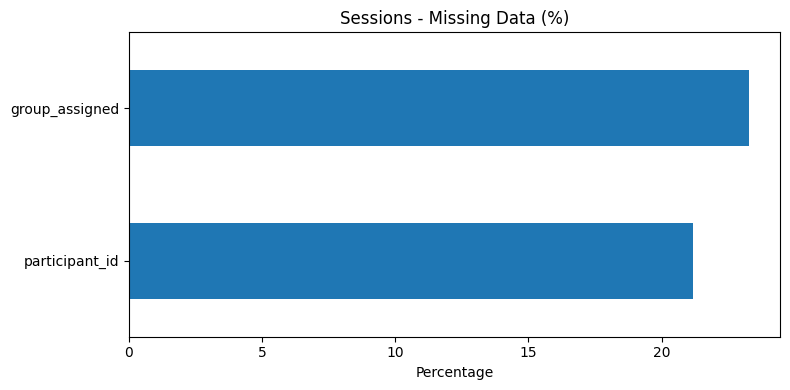


📊 Missing values in Questionnaires:
                        Missing Count   Missing %
ai_benefits                         2    1.333333
ai_benefits_other                 147   98.000000
difficulties                        1    0.666667
difficulties_other                144   96.000000
external_help_details             149   99.333333
ai_limitations                     27   18.000000
additional_comments               102   68.000000
technical_difficulties            150  100.000000


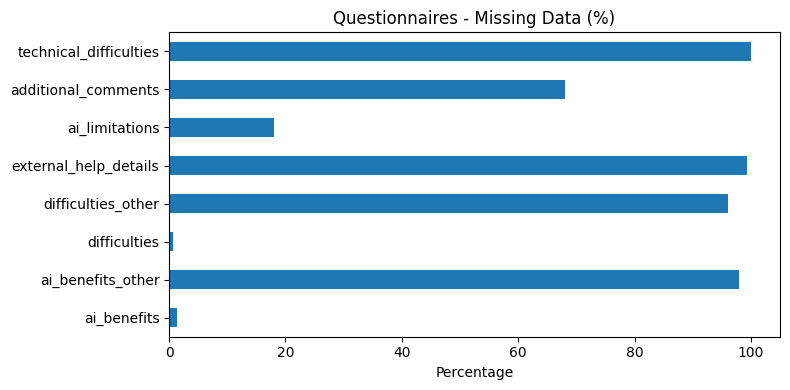


📊 Missing values in Participants:
                          Missing Count   Missing %
education_other                     149  100.000000
ai_tool_specification                36   24.161074
brainstorming_modalities             17   11.409396


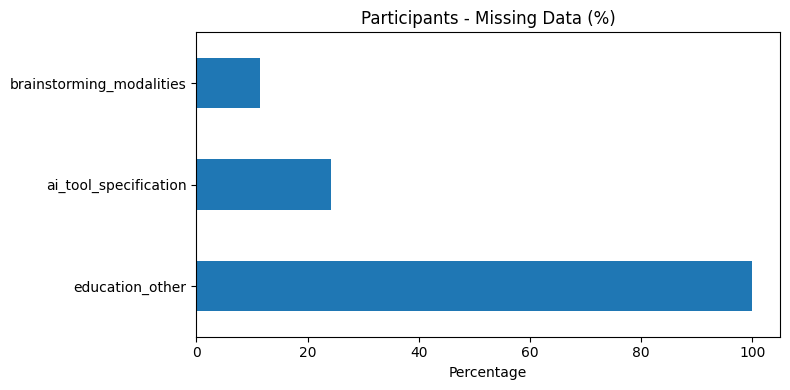


📊 Missing values in Brainstorming Activities:
                       Missing Count   Missing %
used_ideas                         9    5.921053
predefined_ideas_used            152  100.000000


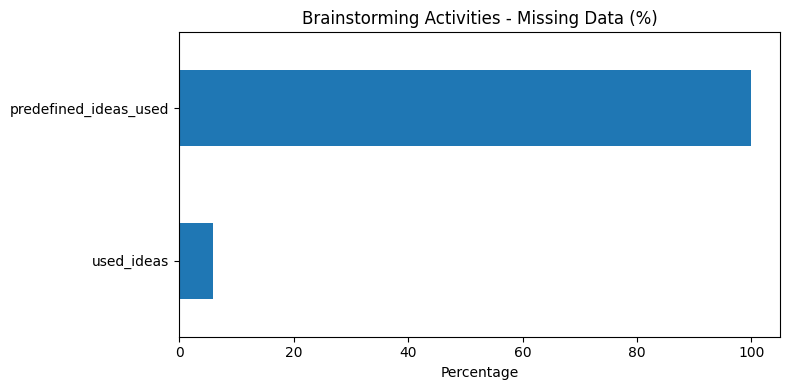

In [11]:
# Apply to each dataset
missing_report(df_sessions, "Sessions")
missing_report(df_questionnaires, "Questionnaires")
missing_report(df_participants, "Participants")
missing_report(df_brainstorming, "Brainstorming Activities")

## **5. Check for Duplicates**

In [12]:
def duplicate_check(df, id_col, name):
    if id_col in df.columns:
        count = df.duplicated(subset=id_col).sum()
        print(f"\n🔁 Duplicates in {name} by '{id_col}': {count}")
    else:
        print(f"\n⚠️ Column '{id_col}' not found in {name}")

# Check session_id and participant_id where relevant
duplicate_check(df_sessions, "session_id", "Sessions")
duplicate_check(df_questionnaires, "session_id", "Questionnaires")
duplicate_check(df_participants, "participant_id", "Participants")
duplicate_check(df_brainstorming, "session_id", "Brainstorming Activities")


🔁 Duplicates in Sessions by 'session_id': 0

🔁 Duplicates in Questionnaires by 'session_id': 0

🔁 Duplicates in Participants by 'participant_id': 0

🔁 Duplicates in Brainstorming Activities by 'session_id': 0


### ✅ **Good Findings:**

1. **No duplicates** - Clean data, no repeated entries
2. **Identified truly empty columns** (100% missing):
   - `education_other` → **Drop it**
   - `predefined_ideas_used` → **Drop it** 
   - `technical_difficulties` → **Drop it**

3. **Optional fields with high missingness** (expected):
   - `additional_comments` (68% missing) - optional feedback
   - `ai_limitations` (18% missing) - not everyone had limitations
   - `ai_tool_specification` (24% missing) - only for AI users

4. **Critical issue confirmed:**
   - **40 sessions without participant_id** (21%) - these are incomplete sessions
   - **44 sessions without group_assigned** (23%) - never got to group assignment

### 🤔 **What This Means:**

The **40 missing participant_ids** are likely:
- People who started the study but dropped out during onboarding
- Never completed the consent/registration phase
- Should probably be **excluded from analysis**

---

## **6. Data Type Validation**

Now let's convert columns to proper types. Here's what you need to convert:

### **Columns to Convert to DateTime:**

```python
# These are currently stored as 'object' (strings) but represent dates/times

Sessions table:
- session_created_at → datetime

Brainstorming Activities table:
- completed_at → datetime

Post Questionnaires table:
- completed_at → datetime
```

### **Why Convert to DateTime?**
1. Calculate session duration between timestamps
2. Analyze temporal patterns (time of day, day of week)
3. Sort chronologically
4. Filter by date ranges

In [13]:
# Convert datetime columns
df_sessions['session_created_at'] = pd.to_datetime(df_sessions['session_created_at'], errors='coerce')
df_brainstorming['completed_at'] = pd.to_datetime(df_brainstorming['completed_at'], errors='coerce')
df_questionnaires['completed_at'] = pd.to_datetime(df_questionnaires['completed_at'], errors='coerce')

# Verify conversion
print("Sessions session_created_at type:", df_sessions['session_created_at'].dtype)
print("Brainstorming completed_at type:", df_brainstorming['completed_at'].dtype)
print("Questionnaires completed_at type:", df_questionnaires['completed_at'].dtype)

Sessions session_created_at type: datetime64[ns, UTC]
Brainstorming completed_at type: datetime64[ns, UTC]
Questionnaires completed_at type: datetime64[ns, UTC]


## 🧹 Cleaning Strategy

#### Step 1: Drop 100% Empty Columns

In [14]:
# Drop completely empty columns
df_participants = df_participants.drop(columns=['education_other'])
df_brainstorming = df_brainstorming.drop(columns=['predefined_ideas_used'])
df_questionnaires = df_questionnaires.drop(columns=['technical_difficulties'])

print("✓ Dropped empty columns")

✓ Dropped empty columns


#### Step 2: Identify Complete Sessions

Complete sessions = sessions with BOTH `participant_id` AND `group_assigned`

In [15]:
# Before filtering
print("Before filtering:")
print(f"Total sessions: {len(df_sessions)}")
print(f"Sessions with participant_id: {df_sessions['participant_id'].notna().sum()}")
print(f"Sessions with group_assigned: {df_sessions['group_assigned'].notna().sum()}")

# Filter to complete sessions only
df_sessions_clean = df_sessions[
    (df_sessions['participant_id'].notna()) & 
    (df_sessions['group_assigned'].notna())
].copy()

print(f"\nAfter filtering:")
print(f"Complete sessions: {len(df_sessions_clean)}")
print(f"Dropped: {len(df_sessions) - len(df_sessions_clean)} incomplete sessions")

Before filtering:
Total sessions: 189
Sessions with participant_id: 149
Sessions with group_assigned: 145

After filtering:
Complete sessions: 142
Dropped: 47 incomplete sessions


#### Step 3: Filter All Other Tables to Match
Keep only data from valid session_ids across all tables:

In [16]:
# Get list of valid session IDs
valid_session_ids = df_sessions_clean['session_id'].unique()

# Filter all tables to only include valid sessions
df_participants_clean = df_participants[df_participants['session_id'].isin(valid_session_ids)].copy()
df_brainstorming_clean = df_brainstorming[df_brainstorming['session_id'].isin(valid_session_ids)].copy()
df_questionnaires_clean = df_questionnaires[df_questionnaires['session_id'].isin(valid_session_ids)].copy()

# Summary
print("\n" + "="*60)
print("CLEAN DATASET SUMMARY")
print("="*60)
print(f"Sessions: {len(df_sessions_clean)}")
print(f"Participants: {len(df_participants_clean)}")
print(f"Brainstorming Activities: {len(df_brainstorming_clean)}")
print(f"Questionnaires: {len(df_questionnaires_clean)}")
print("="*60)


CLEAN DATASET SUMMARY
Sessions: 142
Participants: 142
Brainstorming Activities: 142
Questionnaires: 140


#### Step 4: Verify Data Integrity

In [17]:
# Check that everything matches now
print("\nData Integrity Check:")
print(f"All participants have sessions: {df_participants_clean['session_id'].isin(valid_session_ids).all()}")
print(f"All brainstorming have sessions: {df_brainstorming_clean['session_id'].isin(valid_session_ids).all()}")
print(f"All questionnaires have sessions: {df_questionnaires_clean['session_id'].isin(valid_session_ids).all()}")

# Check group distribution
print("\nGroup Distribution:")
print(df_sessions_clean['group_assigned'].value_counts())


Data Integrity Check:
All participants have sessions: True
All brainstorming have sessions: True
All questionnaires have sessions: True

Group Distribution:
group_assigned
B    71
A    71
Name: count, dtype: int64



📊 Missing values in Questionnaires:
                       Missing Count  Missing %
ai_benefits                        2   1.428571
ai_benefits_other                137  97.857143
difficulties                       1   0.714286
difficulties_other               137  97.857143
external_help_details            139  99.285714
ai_limitations                    26  18.571429
additional_comments               96  68.571429


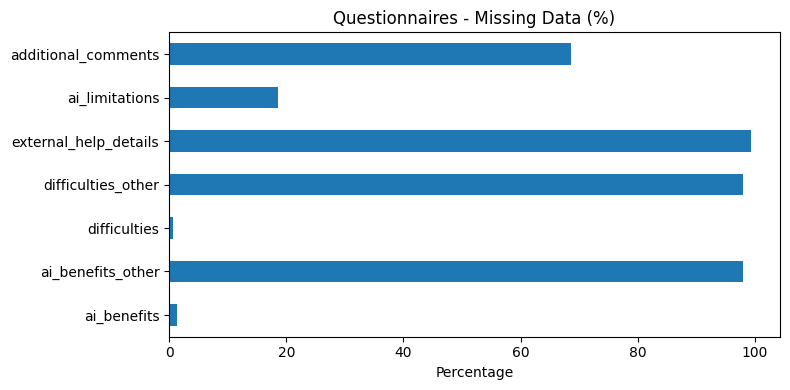

In [18]:
missing_report(df_questionnaires_clean, "Questionnaires")

In [19]:
df_questionnaires_clean.head()

,questionnaire_id,session_id,group,ai_benefits,ai_benefits_other,difficulties,difficulties_other,external_help,external_help_details,ai_helpfulness,ai_limitations,general_impression,idea_quality_utility,idea_quality_originality,personal_implication,additional_comments,completed_at
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,B,stimulatingNewIdeas|timeSaving,NaN,noDifficulty,NaN,noExternalHelp,NaN,2,"If I didn't like the answer, it was still coun...",4,5,4,3,NaN,2025-09-03 18:27:28.764000+00:00
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,B,timeSaving|stimulatingNewIdeas|betterThoughtOr...,NaN,noDifficulty,NaN,noExternalHelp,NaN,5,non,5,4,4,5,NaN,2025-09-03 18:29:20.326000+00:00
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,B,timeSaving|stimulatingNewIdeas,NaN,lackInspiration,NaN,noExternalHelp,NaN,4,no,3,4,4,3,none,2025-09-03 18:46:19.376000+00:00
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,A,helpReformulation,NaN,noDifficulty,NaN,noExternalHelp,NaN,4,non,4,4,3,4,"session tres interessante, je vous en remercie",2025-09-03 18:44:13.411000+00:00
4,5,421a5ad2-0867-460b-891b-200786b51f60,B,timeSaving|stimulatingNewIdeas|betterThoughtOr...,NaN,noDifficulty,NaN,noExternalHelp,NaN,5,Non je n'ai pas perçu de freins ou de limites ...,5,5,5,5,Très bonne étude.,2025-09-03 18:51:04.137000+00:00


In [20]:
# Drop columns that are too sparse to be useful
columns_to_drop = ['external_help_details', 'difficulties_other', 'ai_benefits_other']
df_questionnaires_clean = df_questionnaires_clean.drop(columns=columns_to_drop)

#### Parse pipe-separated fields into lists

In [21]:
# Convert to list (better for detailed analysis)
df_questionnaires_clean['ai_benefits'] = df_questionnaires_clean['ai_benefits'].str.split('|')
df_questionnaires_clean['difficulties'] = df_questionnaires_clean['difficulties'].str.split('|')

In [22]:
df_questionnaires_clean.head(10)

,questionnaire_id,session_id,group,ai_benefits,difficulties,external_help,ai_helpfulness,ai_limitations,general_impression,idea_quality_utility,idea_quality_originality,personal_implication,additional_comments,completed_at
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,B,"[stimulatingNewIdeas, timeSaving]",[noDifficulty],noExternalHelp,2,"If I didn't like the answer, it was still coun...",4,5,4,3,NaN,2025-09-03 18:27:28.764000+00:00
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,B,"[timeSaving, stimulatingNewIdeas, betterThough...",[noDifficulty],noExternalHelp,5,non,5,4,4,5,NaN,2025-09-03 18:29:20.326000+00:00
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,B,"[timeSaving, stimulatingNewIdeas]",[lackInspiration],noExternalHelp,4,no,3,4,4,3,none,2025-09-03 18:46:19.376000+00:00
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,A,[helpReformulation],[noDifficulty],noExternalHelp,4,non,4,4,3,4,"session tres interessante, je vous en remercie",2025-09-03 18:44:13.411000+00:00
4,5,421a5ad2-0867-460b-891b-200786b51f60,B,"[timeSaving, stimulatingNewIdeas, betterThough...",[noDifficulty],noExternalHelp,5,Non je n'ai pas perçu de freins ou de limites ...,5,5,5,5,Très bonne étude.,2025-09-03 18:51:04.137000+00:00
5,6,48f08421-3398-419f-89c1-af893671f677,A,"[timeSaving, stimulatingNewIdeas, helpReformul...",[noDifficulty],noExternalHelp,5,Non pas du tout !,4,4,5,4,NaN,2025-09-03 18:58:58.472000+00:00
6,7,50af2df8-a0d6-41f2-b92d-62b4badc8c76,B,[stimulatingNewIdeas],NaN,noExternalHelp,5,NaN,4,4,4,5,NaN,2025-09-03 19:37:04.768000+00:00
7,8,db0e57c1-afb9-41e7-933d-216f2a726f40,B,"[stimulatingNewIdeas, betterThoughtOrganization]",[lackInspiration],noExternalHelp,3,je n'ai pas d'exemple en tête,3,4,2,3,NaN,2025-09-03 19:27:12.904000+00:00
8,9,2e06debc-a75d-4456-a492-31826fa547a3,A,[stimulatingNewIdeas],[noDifficulty],noExternalHelp,3,La seule véritable limite était dans le nombre...,3,3,3,3,Non,2025-09-03 19:34:51.582000+00:00
9,10,ba10e220-31a7-4056-ae39-177dca01e57f,A,"[timeSaving, stimulatingNewIdeas, betterThough...",[noDifficulty],noExternalHelp,5,faute de syntaxe,3,2,2,2,NaN,2025-09-03 20:04:16.204000+00:00



📊 Missing values in Participants:
                          Missing Count  Missing %
ai_tool_specification                34  23.943662
brainstorming_modalities             16  11.267606


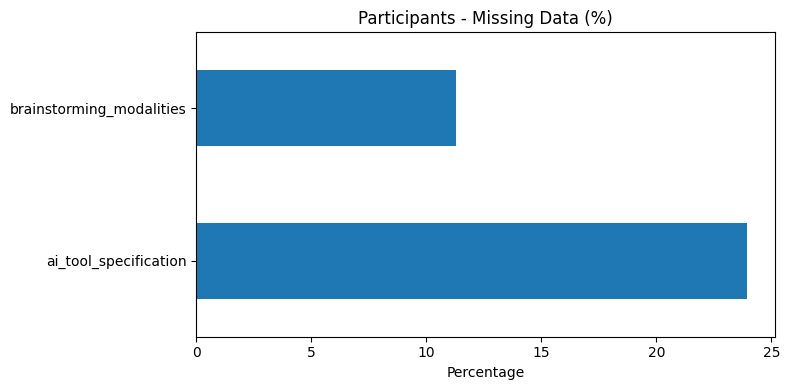

In [23]:
missing_report(df_participants_clean, "Participants")

In [24]:
df_participants_clean.head()

,participant_id,session_id,language,education_level,ai_tools_usage,ai_comfort_level,creativity_level,ai_creative_process,ai_tool_specification,brainstorming_experience,brainstorming_modalities,consent_confirmation,instructions_understood
0,673b723b78a95d45ec47c311,362a42fb-cf47-4ebf-abf6-7c1131f94e11,en,bac23,never,1,3,no,NaN,few,inPerson,True,True
1,5ede918b4280d611f9a38200,187aea78-1f2b-4720-98f7-3915ddb659be,fr,doctorat,regularly,5,3,yes,Support à la créativité,many,inPerson,True,True
2,58bfee7de5869400018f5e9e,9249cc22-ee1a-440e-85d0-3f018afbe082,en,bac45,regularly,4,4,no,NaN,few,remote,True,True
3,68262995c77dd8cc9b293aa6,0c82ca88-3e43-49ed-859f-fd24173e7fe6,fr,bac45,occasionally,3,4,yes,ChatGPT pour resoudre un probleme statistique,few,inPerson,True,True
4,5d164f9b1a4be700176367bd,421a5ad2-0867-460b-891b-200786b51f60,fr,bac23,regularly,4,3,no,NaN,many,remote,True,True


In [25]:
df_participants_clean.ai_tool_specification.value_counts()

ai_tool_specification
Support à la créativité                                                                                                                                                   1
ChatGPT pour resoudre un probleme statistique                                                                                                                             1
J'utilise ChatGPT dans un cadre professionnel pour du code et du rédactionnel.                                                                                            1
ChatGPT que j'ai utiliser pour avoir des instructions pour monter mon PC                                                                                                  1
Pour créer un wallpaper spécifique, en utilisant Leonardo AI                                                                                                              1
                                                                                                                      

In [26]:
df_participants_clean.brainstorming_modalities.value_counts()

brainstorming_modalities
inPerson|remote    56
inPerson           51
remote|inPerson    12
remote              7
Name: count, dtype: int64

## 🔍 **Text Analysis of `ai_tool_specification` - Do it LATER**

Looking at your data, people mentioned:
- "ChatGPT pour resoudre un probleme statistique"
- "Gemini - création de cours"
- "Leonardo AI" (for wallpaper creation)
- "Support à la créativité"

### **This is Feature Engineering, NOT Cleaning**

**Current Phase (Cleaning):** ✅ Keep as-is
**Later Phase (EDA/Analysis):** Extract which tools they use

In [27]:
df_participants_clean['brainstorming_modalities'] = \
    df_participants_clean['brainstorming_modalities'].str.split('|')

In [28]:
df_participants_clean.head()

,participant_id,session_id,language,education_level,ai_tools_usage,ai_comfort_level,creativity_level,ai_creative_process,ai_tool_specification,brainstorming_experience,brainstorming_modalities,consent_confirmation,instructions_understood
0,673b723b78a95d45ec47c311,362a42fb-cf47-4ebf-abf6-7c1131f94e11,en,bac23,never,1,3,no,NaN,few,[inPerson],True,True
1,5ede918b4280d611f9a38200,187aea78-1f2b-4720-98f7-3915ddb659be,fr,doctorat,regularly,5,3,yes,Support à la créativité,many,[inPerson],True,True
2,58bfee7de5869400018f5e9e,9249cc22-ee1a-440e-85d0-3f018afbe082,en,bac45,regularly,4,4,no,NaN,few,[remote],True,True
3,68262995c77dd8cc9b293aa6,0c82ca88-3e43-49ed-859f-fd24173e7fe6,fr,bac45,occasionally,3,4,yes,ChatGPT pour resoudre un probleme statistique,few,[inPerson],True,True
4,5d164f9b1a4be700176367bd,421a5ad2-0867-460b-891b-200786b51f60,fr,bac23,regularly,4,3,no,NaN,many,[remote],True,True



📊 Missing values in Brainstorming Activities:
            Missing Count  Missing %
used_ideas              9   6.338028


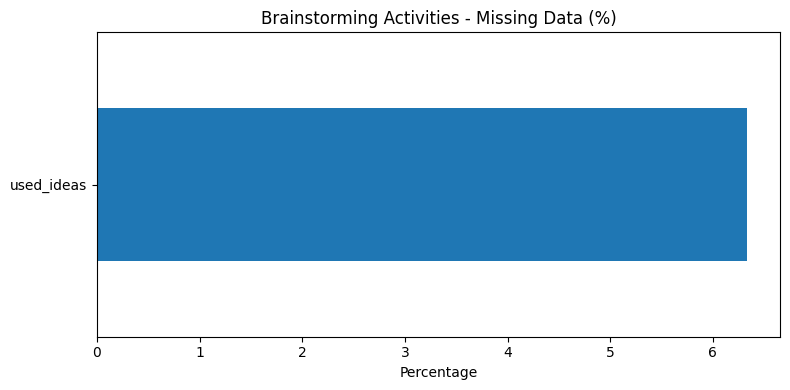

In [29]:
missing_report(df_brainstorming_clean, "Brainstorming Activities")

`used_ideas` → Currently `"1|2|3|4|5"` (string with pipes)

In [30]:
# Step 1: Split the strings by pipe first
df_brainstorming_clean['used_ideas'] = df_brainstorming_clean['used_ideas'].str.split('|')

# Step 2: Convert to integers (handle NaN and empty strings)
df_brainstorming_clean['used_ideas'] = df_brainstorming_clean['used_ideas'].apply(
    lambda x: [int(i) for i in x] if isinstance(x, list) and x != [''] else []
)

In [31]:
df_brainstorming_clean.head()

,activity_id,session_id,mode,group,ideas_text,ideas_count,used_ideas,total_predefined_ideas,ai_usage_count,session_duration_seconds,current_idea_index,question_prompt,completed_at
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,direct,B,Idea 1: Have a password or code word.\n\nIdea ...,9,"[1, 2, 3, 4, 5]",5,5,600,5,What creative solutions to secure everyday con...,2025-09-03 18:26:28.233000+00:00
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,direct,B,Coffre fort\nMot de passe\nDétection iris\nEmp...,6,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:28:20.216000+00:00
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,direct,B,To find a safe place for watches. To have digi...,6,"[1, 2, 3, 4, 5]",5,5,600,5,What creative solutions to secure everyday con...,2025-09-03 18:45:08.707000+00:00
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,question,A,Comment pourrions-nous utiliser la voix multif...,7,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:41:22.406000+00:00
4,5,421a5ad2-0867-460b-891b-200786b51f60,direct,B,Voix multifactorielle : l'assistant vocal ne s...,14,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:48:07.305000+00:00


In [32]:
df_brainstorming_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   activity_id               142 non-null    int64              
 1   session_id                142 non-null    object             
 2   mode                      142 non-null    object             
 3   group                     142 non-null    object             
 4   ideas_text                142 non-null    object             
 5   ideas_count               142 non-null    int64              
 6   used_ideas                142 non-null    object             
 7   total_predefined_ideas    142 non-null    int64              
 8   ai_usage_count            142 non-null    int64              
 9   session_duration_seconds  142 non-null    int64              
 10  current_idea_index        142 non-null    int64              
 11  question_prompt         

## **7. Check Relationships Between Tables**

In [33]:
print("="*60)
print("FINAL RELATIONSHIP CHECK")
print("="*60)

# Get all unique session_ids from each table
sessions_ids = set(df_sessions_clean['session_id'])
participants_ids = set(df_participants_clean['session_id'])
brainstorming_ids = set(df_brainstorming_clean['session_id'])
questionnaires_ids = set(df_questionnaires_clean['session_id'])

print(f"\nUnique session_ids:")
print(f"  Sessions: {len(sessions_ids)}")
print(f"  Participants: {len(participants_ids)}")
print(f"  Brainstorming: {len(brainstorming_ids)}")
print(f"  Questionnaires: {len(questionnaires_ids)}")

# Check if all match
print(f"\n✓ All participants in sessions: {participants_ids.issubset(sessions_ids)}")
print(f"✓ All brainstorming in sessions: {brainstorming_ids.issubset(sessions_ids)}")
print(f"✓ All questionnaires in sessions: {questionnaires_ids.issubset(sessions_ids)}")

# Check for orphans (should be none after filtering)
orphan_participants = participants_ids - sessions_ids
orphan_brainstorming = brainstorming_ids - sessions_ids
orphan_questionnaires = questionnaires_ids - sessions_ids

print(f"\nOrphan records:")
print(f"  Participants: {len(orphan_participants)}")
print(f"  Brainstorming: {len(orphan_brainstorming)}")
print(f"  Questionnaires: {len(orphan_questionnaires)}")

print("\n" + "="*60)
if len(orphan_participants) == 0 and len(orphan_brainstorming) == 0 and len(orphan_questionnaires) == 0:
    print("✅ DATA INTEGRITY VERIFIED - Ready for EDA!")
else:
    print("⚠️ Warning: Orphan records found - investigate before EDA")
print("="*60)

FINAL RELATIONSHIP CHECK

Unique session_ids:
  Sessions: 142
  Participants: 142
  Brainstorming: 142
  Questionnaires: 140

✓ All participants in sessions: True
✓ All brainstorming in sessions: True
✓ All questionnaires in sessions: True

Orphan records:
  Participants: 0
  Brainstorming: 0
  Questionnaires: 0

✅ DATA INTEGRITY VERIFIED - Ready for EDA!


In [34]:
# ============================================================================
# SAVE CLEANED DATASETS
# ============================================================================

# Define output directory
output_dir = project_root / "data" / "outputs"
output_dir.mkdir(exist_ok=True, parents=True)

print("="*60)
print("SAVING CLEANED DATASETS")
print("="*60)
print(f"\nOutput directory: {output_dir}\n")

# Dictionary of dataframes to save
datasets = {
    'sessions_clean': df_sessions_clean,
    'participants_clean': df_participants_clean,
    'brainstorming_clean': df_brainstorming_clean,
    'questionnaires_clean': df_questionnaires_clean
}

# Save both CSV and Parquet formats
for name, df in datasets.items():
    # Save CSV (human-readable, shareable)
    csv_path = output_dir / f'{name}.csv'
    df.to_csv(csv_path, index=False)
    csv_size = csv_path.stat().st_size / 1024  # Size in KB
    print(f"✅ CSV:     {name}.csv ({csv_size:.1f} KB)")
    
    # Save Parquet (preserves dtypes, faster)
    parquet_path = output_dir / f'{name}.parquet'
    df.to_parquet(parquet_path, index=False)
    parquet_size = parquet_path.stat().st_size / 1024  # Size in KB
    print(f"✅ Parquet: {name}.parquet ({parquet_size:.1f} KB)")
    print(f"   → Space saved: {csv_size - parquet_size:.1f} KB\n")

print("="*60)
print("✅ ALL DATASETS SAVED SUCCESSFULLY!")
print("="*60)
print(f"\nFiles location: {output_dir}")
print("\nSaved files:")
print("  CSV Format (for sharing/viewing):")
for name in datasets.keys():
    print(f"    - {name}.csv")
print("\n  Parquet Format (for analysis):")
for name in datasets.keys():
    print(f"    - {name}.parquet")

SAVING CLEANED DATASETS

Output directory: /home/amiche/Projects/DataEngineer/Hello_pulse_survey/data/outputs

✅ CSV:     sessions_clean.csv (14.1 KB)
✅ Parquet: sessions_clean.parquet (14.7 KB)
   → Space saved: -0.6 KB

✅ CSV:     participants_clean.csv (27.0 KB)
✅ Parquet: participants_clean.parquet (24.7 KB)
   → Space saved: 2.3 KB

✅ CSV:     brainstorming_clean.csv (182.3 KB)
✅ Parquet: brainstorming_clean.parquet (78.8 KB)
   → Space saved: 103.5 KB

✅ CSV:     questionnaires_clean.csv (30.3 KB)
✅ Parquet: questionnaires_clean.parquet (23.5 KB)
   → Space saved: 6.8 KB

✅ ALL DATASETS SAVED SUCCESSFULLY!

Files location: /home/amiche/Projects/DataEngineer/Hello_pulse_survey/data/outputs

Saved files:
  CSV Format (for sharing/viewing):
    - sessions_clean.csv
    - participants_clean.csv
    - brainstorming_clean.csv
    - questionnaires_clean.csv

  Parquet Format (for analysis):
    - sessions_clean.parquet
    - participants_clean.parquet
    - brainstorming_clean.parquet
 